In [4]:
from data_clean_script import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
X,y = split_with_bow()

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [12]:
X['sentiment'] = 1 + X['sentiment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=5,test_size=.2)

In [14]:
clf = MultinomialNB()

In [15]:
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

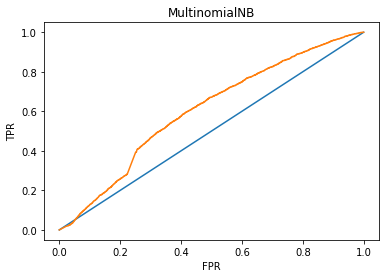

<Figure size 432x288 with 0 Axes>

In [18]:
y_preds = clf.predict_proba(X_test)[:,1]

fpr, tpr,thresh = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.title('MultinomialNB')
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
plt.savefig('mult_nb_roc_auc.eps',format='eps')